In [0]:
import tensorflow as tf
import numpy as np

In [0]:
sess = tf.InteractiveSession()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
# Using NumPy to create a 2D array of complex numbers on [-3,3]x[-4,2]

Y, X = np.mgrid[-3:3:0.005, -4:2:0.005] 
Z = X+1j*Y

In [0]:
#Declaration of constants and variables
xs = tf.constant(Z.astype(np.float32)) 
ys = tf.constant(Y.astype(np.float32))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))
#Compute Sine and Cosine
t = 0.4 - 6/(1 + xs*xs + ys*ys)
zsc = tf.math.cos(t,name=None)
zss = tf.math.sin(t,name=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


In [0]:
tf.global_variables_initializer().run() #init variables

In [0]:
#Combination of Ikeda Map and Mandelbrot
#Compute the new values of xss, yss and zs
xss = 1 + 0.92*(xs*zsc-ys*zss)
yss = 0.92*(xs*zss+ys*zsc)
zs_ = zs + xss*xss + yss*yss 

In [0]:
# Have we diverged with this new value?
not_diverged = tf.abs(zs_) < 4

In [0]:
# Operation to update the zs and the iteration count
# Note: We keep computing zs after they diverge! This
# is very wasteful! There are better, if a little
# less simple, ways to do this.
#
step = tf.group( zs.assign(zs_), ns.assign_add(tf.cast(not_diverged, tf.float32)) )

In [0]:
#run
for i in range(200):
    step.run()

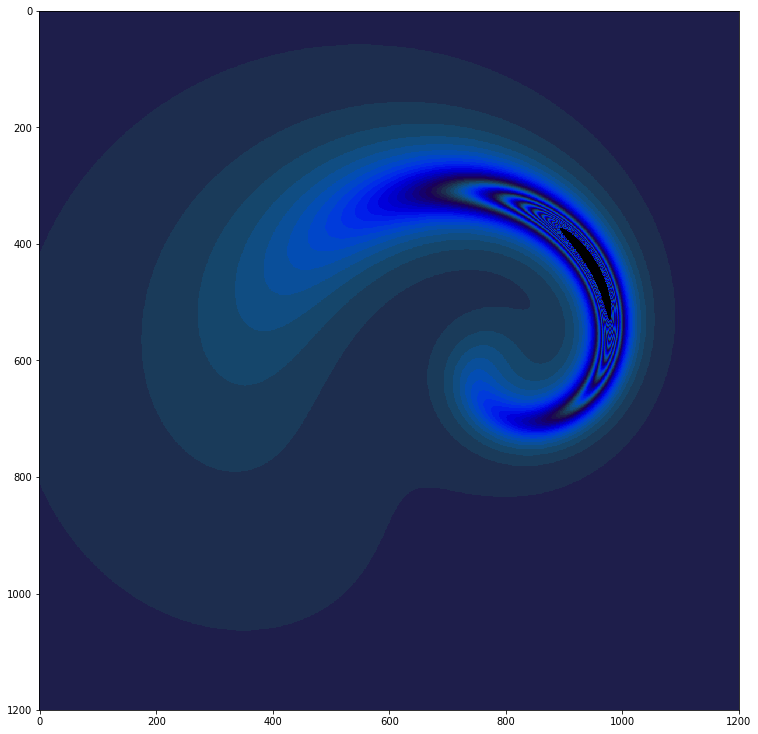

In [0]:
#plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,10))

def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a
plt.imshow(processFractal(ns.eval()))
plt.tight_layout(pad=0)
plt.show()    

In [0]:
sess.close()